# Y E A S T

### 'fine replicates' and their consistency 

In [11]:
import pandas as pd
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 300

In [12]:
# basic bayexpress functions

# calculating Bayes factors for expression change
def get_BF_21(N_1, n_1, N_2, n_2):

    return (sc.betaln( u_1 + n_1, u_2 + N_1 - n_1) + sc.betaln( u_1 + n_2, u_2 + N_2 - n_2) - sc.betaln( u_1 + n_1 + n_2, u_2 + N_1 - n_1 + N_2 - n_2)) / np.log(10) 

# ratio of expression 
# calculating log fold change
def get_FC(N_1, n_1, N_2, n_2):
    rate_1 = (u_1 + n_1) / (u_2 + N_1 - n_1)
    rate_2 = (u_1 + n_2) / (u_2 + N_2 - n_2)

    return np.log2(rate_2 / rate_1)

# calculating q (following Laplace's rule of succession)
def get_q(n, N):
    return (n+1)/(N+2)

# setting the priors to flat prios
u_1 = 1
u_2 = 1


# calculating Bayes factors for consistency checks

def get_BF_k1(data):
    # this range is irrelevant if we want to do all 
    k = len(data.columns)

    evidence2 = np.full(len(data), 0)

    # iterating over j until k
    for col in data.columns[1:k]: 
        n_j = data[col]
        # print(n_j, 'n_j')
        N_j = sum(data[col])
        # print(N_j, 'N_j')
        evidence2 = evidence2 + sc.betaln(u_1 + n_j, u_2 + N_j - n_j)

    N = sum(data.iloc[:,1:k].sum(axis=0, numeric_only=True))
    n_i = data.iloc[:,1:k].sum(axis=1, numeric_only=True)

    # print(n_i, 'n_i')
    # print(N, 'N')

    evidence1 = sc.betaln( u_1 + n_i, u_2 + N - n_i)

    return (evidence2 - evidence1) / np.log(10) 


In [13]:
# exploring 'cumulative' BF

def get_cumu_BF(data):
    out_data = pd.DataFrame({})
    for k in range(3,len(data.columns)+1):

        evidence2 = np.full(len(data), 0)

        # iterating over j until k
        for col in data.columns[1:k]: 
            n_j = data[col]
            # print(n_j, 'n_j')
            N_j = sum(data[col])
            # print(N_j, 'N_j')
            evidence2 = evidence2 + sc.betaln(u_1 + n_j, u_2 + N_j - n_j)

        N = sum(data.iloc[:,1:k].sum(axis=0, numeric_only=True))
        n_i = data.iloc[:,1:k].sum(axis=1, numeric_only=True)

        # print(n_i, 'n_i')
        # print(N, 'N')

        evidence1 = sc.betaln( u_1 + n_i, u_2 + N - n_i)
        
        out_data[f'{k-1}'] = (evidence2 - evidence1) / np.log(10) 

    return out_data


### CONSISTENCY TESTS

In [14]:
WT_yeast = pd.read_csv('WT_yeast.csv', index_col=0)
Snf2_yeast = pd.read_csv('Snf2_yeast.csv', index_col=0)

display(WT_yeast)
display(Snf2_yeast)

,genes,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,15S_rRNA,2,12,31,8,21,11,2,3,7,...,0,49,9,4,11,12,1,22,12,4
1,21S_rRNA,20,76,101,99,128,74,36,32,57,...,10,274,49,30,72,58,21,159,107,70
2,HRA1,3,2,2,2,3,5,4,0,4,...,5,3,6,5,2,2,2,5,2,1
3,ICR1,75,123,107,157,98,245,119,120,119,...,85,177,137,118,113,81,142,94,187,106
4,LSR1,60,163,233,163,193,375,194,84,211,...,66,385,232,149,114,81,109,132,243,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7122,tY(GUA)M1,0,0,1,1,1,1,0,0,1,...,0,1,1,0,1,0,0,0,1,0
7123,tY(GUA)M2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7124,tY(GUA)O,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


,genes,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,15S_rRNA,4,2,5,5,46,5,4,2,40,...,7,15,6,1,85,8,34,3,6,3
1,21S_rRNA,31,18,23,44,356,35,33,13,148,...,64,79,67,13,576,52,234,23,44,24
2,HRA1,5,1,3,1,2,1,4,4,0,...,5,5,0,2,0,1,2,2,0,1
3,ICR1,205,196,211,252,127,275,160,190,146,...,286,155,184,164,202,186,148,183,195,145
4,LSR1,210,103,159,260,298,303,96,132,263,...,250,195,153,57,742,227,227,117,224,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,2,1,1
7122,tY(GUA)M1,0,0,1,0,2,0,0,0,0,...,1,1,1,0,0,0,0,0,0,1
7123,tY(GUA)M2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7124,tY(GUA)O,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [15]:
# calculating 'cumulatative' BF_k1

WT_cumu = get_cumu_BF(WT_yeast)

display(WT_cumu)

Snf2_cumu = get_cumu_BF(Snf2_yeast)


display(Snf2_cumu)

,2,3,4,5,6,7,8,9,10,11,...,33,34,35,36,37,38,39,40,41,42
0,-4.824123,-4.912829,-8.839685,-14.117564,-17.996641,-21.086076,-24.943705,-30.693142,-36.473404,-36.748828,...,-78.392957,-79.236264,-83.873072,-87.899103,-93.755645,-99.564530,-98.737339,-102.165373,-107.111094,-111.028167
1,-0.963656,0.632576,-4.889390,-5.707717,-1.756501,-1.034256,1.474677,-3.694451,-4.328017,30.503034,...,314.603331,332.522436,337.316054,341.359343,335.890120,333.215257,356.876602,375.089399,370.679089,365.965229
2,-5.943931,-12.083265,-18.278537,-24.465218,-30.802653,-36.940374,-42.530537,-48.629171,-54.649860,-60.521649,...,-192.140921,-198.484739,-204.355581,-210.085429,-216.320230,-222.587706,-228.790003,-234.076721,-240.250222,-246.380070
3,-4.823112,-9.807353,-15.238338,-19.905392,-24.625241,-29.785183,-34.360645,-39.709611,-44.590227,-49.889550,...,-155.375929,-160.782614,-166.296698,-171.236715,-175.771447,-179.030847,-184.072077,-188.751188,-193.899154,-199.310861
4,0.108211,10.803119,9.032746,4.700363,1.487643,-3.873543,11.533645,7.137768,1.803757,6.654632,...,249.996802,253.183338,247.773924,242.971550,239.948338,250.582110,269.366427,264.188637,259.247720,257.043307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,-6.286567,-12.763830,-19.421876,-26.124338,-32.363821,-39.044382,-45.782284,-52.528131,-59.264657,-65.422555,...,-215.130801,-222.115884,-229.041179,-235.853189,-242.628019,-249.481368,-256.468048,-263.178684,-270.184691,-277.038617
7122,-6.531056,-12.675472,-19.165382,-25.559965,-32.208462,-38.822300,-45.496440,-51.930123,-58.585525,-65.225674,...,-209.970841,-216.538875,-223.000753,-229.707786,-235.891374,-242.622613,-249.440170,-256.071351,-262.651404,-269.387754
7123,-6.531056,-12.675472,-19.333519,-26.035980,-32.922786,-39.191373,-45.993039,-52.789226,-59.566314,-66.302507,...,-215.904536,-222.907910,-229.847933,-236.670440,-243.454560,-250.319009,-257.321064,-264.038923,-271.060168,-277.923892
7124,-6.531056,-13.174062,-20.012232,-26.815334,-33.841214,-39.875493,-46.740922,-53.587450,-60.405100,-67.173308,...,-217.027288,-224.048953,-230.003826,-236.826334,-243.610453,-250.474902,-257.476958,-264.194816,-271.216061,-277.030310


,2,3,4,5,6,7,8,9,10,11,...,35,36,37,38,39,40,41,42,43,44
0,-6.103991,-12.057457,-18.248233,-0.689254,-4.779452,-10.148008,-14.380417,-8.405656,-13.822875,-19.135557,...,58.990171,53.171198,50.286105,48.540940,67.204146,63.100998,59.969102,58.492922,55.074698,52.273279
1,-5.373082,-11.152096,-15.709169,164.012305,176.098447,175.473667,187.389002,199.129378,194.351127,194.767768,...,804.627349,799.728536,799.019121,811.207678,1011.496083,1014.180313,1037.861715,1054.538366,1059.645076,1068.603540
2,-5.776665,-11.988302,-18.045738,-24.279166,-30.448821,-36.302987,-42.457222,-48.388459,-54.694911,-60.979764,...,-209.316343,-214.850561,-220.739455,-226.997613,-232.939793,-239.278730,-245.600999,-251.971431,-257.999634,-264.347894
3,-4.971297,-9.804811,-14.992280,-19.330740,-24.753763,-29.744215,-34.505353,-38.882697,-44.050455,-49.311961,...,-155.746721,-161.075340,-166.370178,-170.515722,-175.754308,-181.035691,-186.357233,-191.677668,-196.533408,-201.913097
4,-0.576562,-5.754128,-6.633886,15.230201,10.031782,15.283111,17.306187,20.515392,18.416235,13.685228,...,321.437539,316.081994,316.897201,329.751911,485.680806,480.472207,476.587686,482.279438,477.098099,473.797677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,-6.404911,-13.017210,-19.762178,-26.456642,-33.341253,-39.530966,-46.347490,-53.129063,-59.979981,-66.750607,...,-230.114841,-236.079392,-242.999319,-249.784977,-256.694193,-263.577612,-270.417138,-275.356707,-281.477286,-287.490152
7122,-6.672068,-12.950527,-19.695495,-25.231652,-31.904670,-38.586324,-45.341319,-52.078137,-58.880708,-65.618429,...,-222.528536,-228.875641,-235.353807,-242.033736,-248.799687,-255.553666,-262.281139,-269.041926,-275.805506,-282.046301
7123,-6.672068,-13.449795,-20.336202,-27.102349,-34.092758,-40.946441,-47.886024,-54.757106,-61.704721,-67.404270,...,-229.953348,-236.815191,-243.748169,-250.542638,-257.463792,-264.357998,-271.206862,-278.100616,-284.993383,-291.816655
7124,-6.334297,-12.946597,-19.691564,-26.386028,-33.270640,-40.066980,-46.945034,-53.063258,-59.914177,-66.684802,...,-228.743133,-234.775721,-241.682596,-248.459444,-255.356721,-262.229353,-269.059542,-275.932839,-282.805731,-289.612759


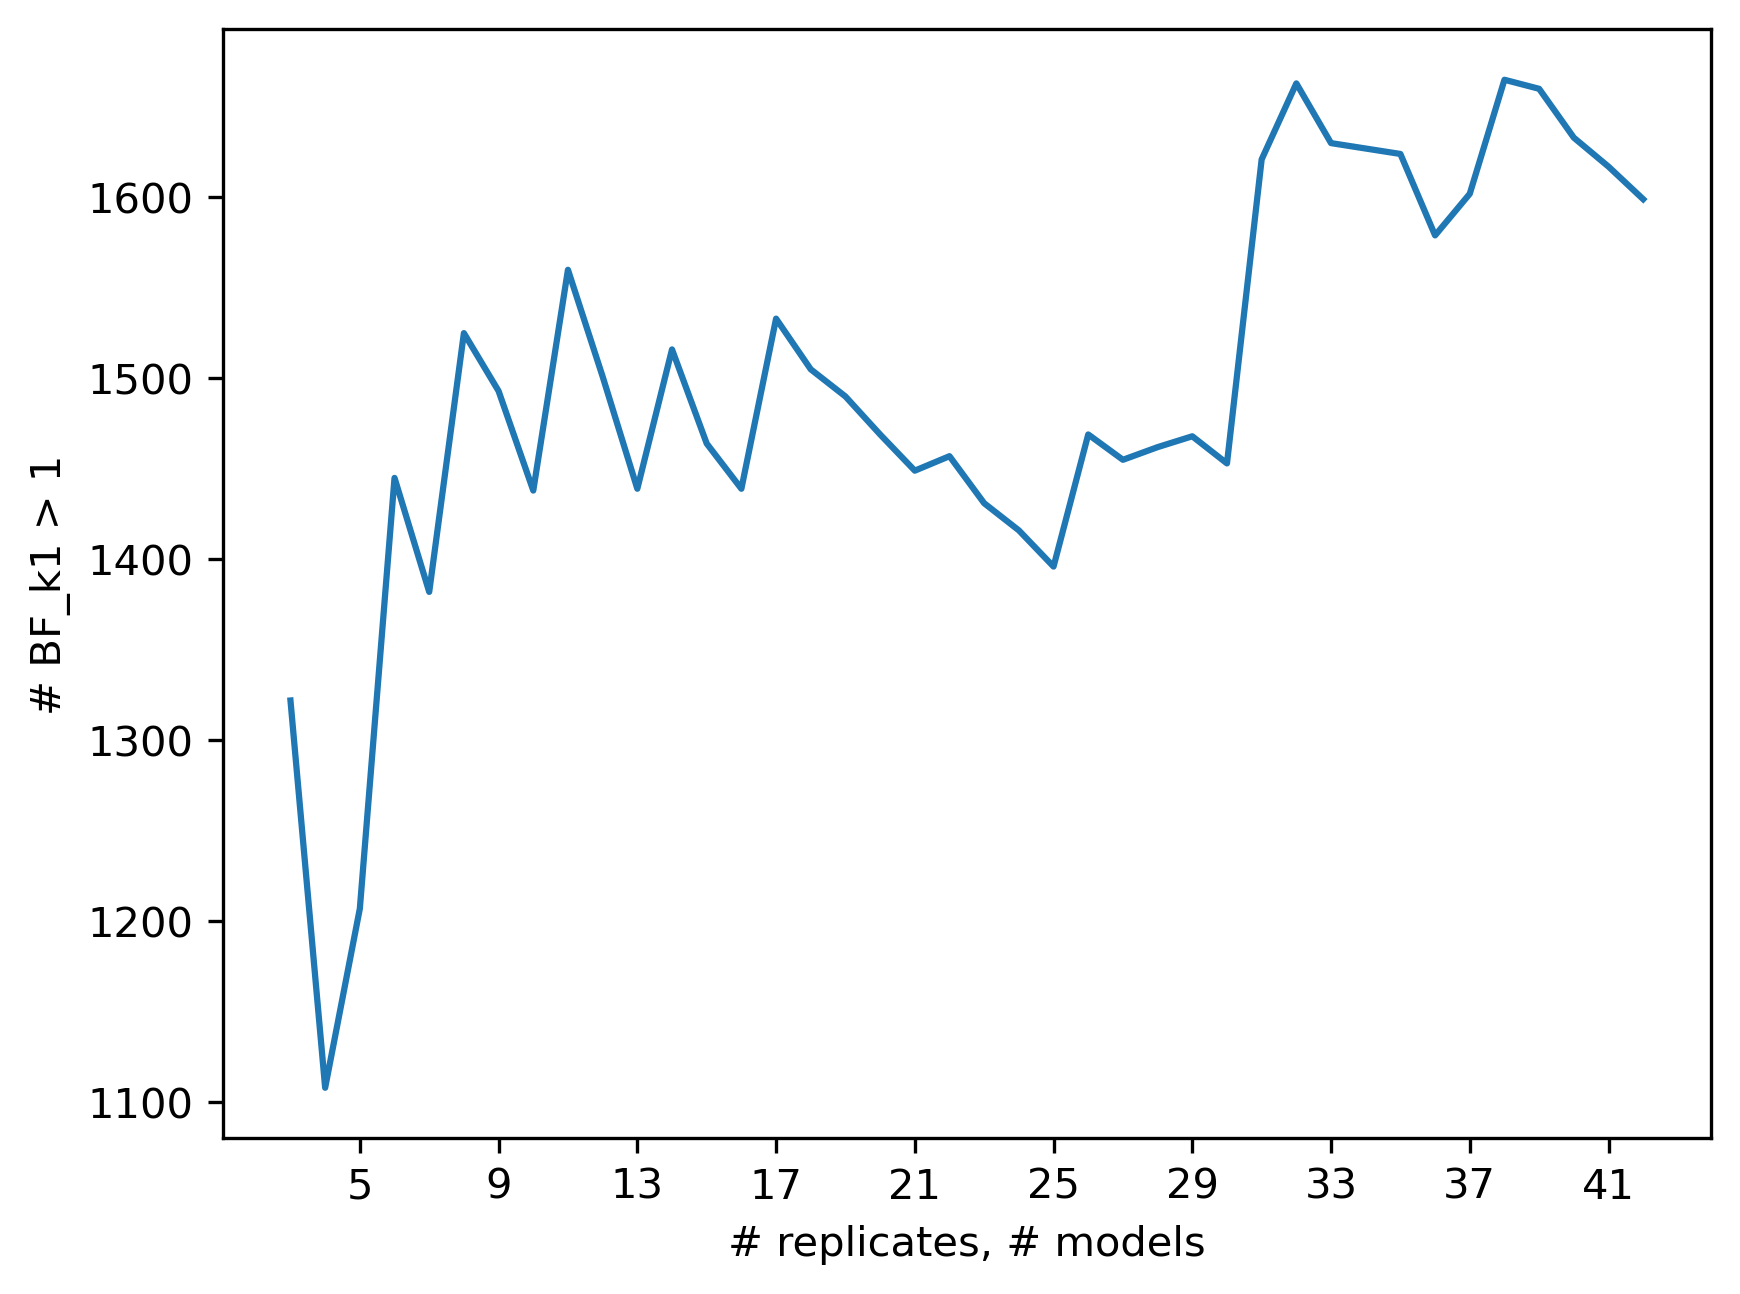

In [16]:
# this is the general idea

# finding the number of genes with BF_k1 > 1 while increasing number of reps
series = (WT_cumu.iloc[:,1:] > 1).sum()

series.plot(xlabel='# replicates, # models', ylabel='# BF_k1 > 1', xticks=range(2,len(series),4), legend=False)


plt.show()

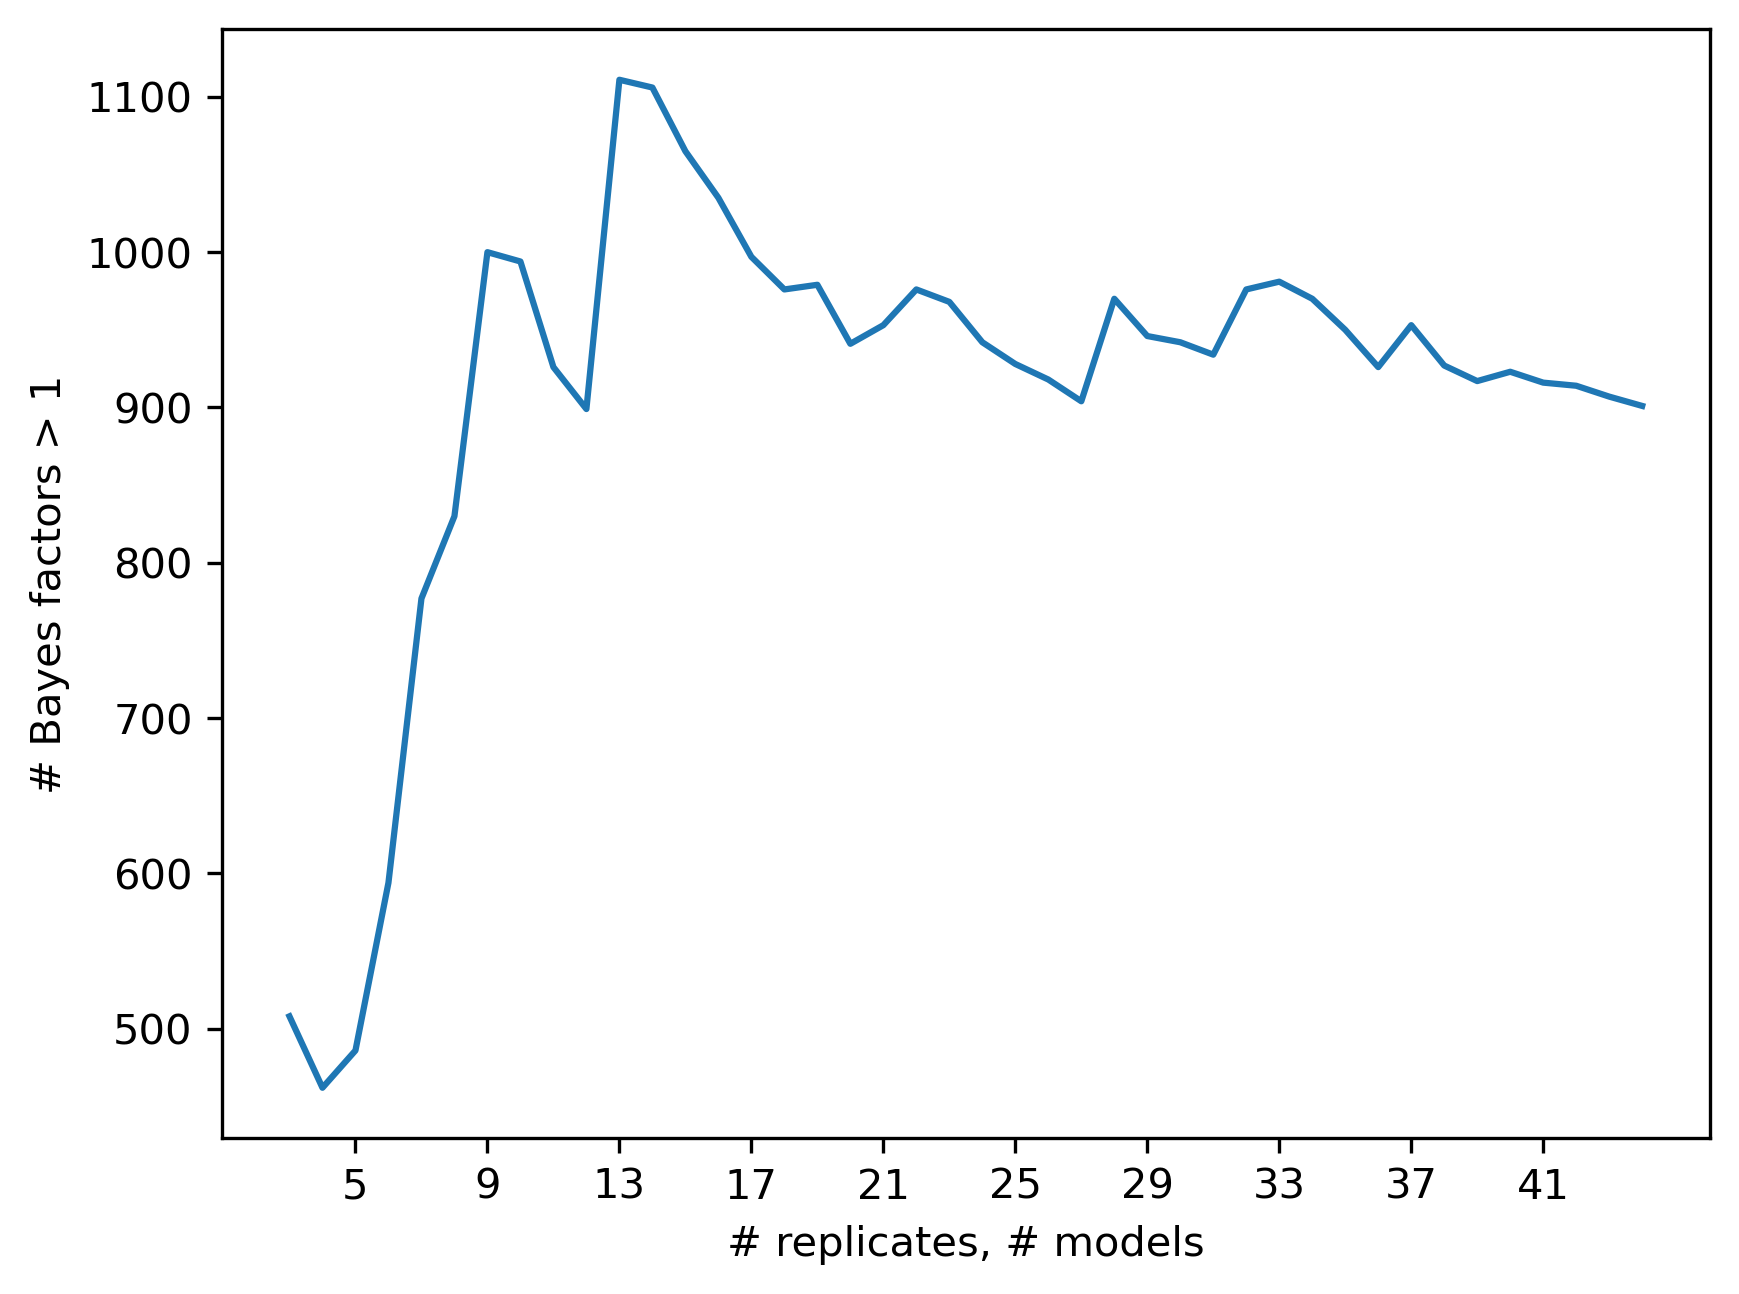

In [17]:
# this is the general idea

# finding the number of genes with BF_k1 > 1 while increasing number of reps
series = (Snf2_cumu.iloc[:,1:] > 1).sum()


series.plot(xlabel='# replicates, # models', ylabel='# Bayes factors > 1', xticks=range(2,len(series),4), legend=False)

plt.show()

In [18]:
# then bootstrapping this idea
# 20 times for figure

WT_cons_it_20 = pd.DataFrame({})
# let's do this with more iterations
# Which genes are consistently inconsistent (CIG) in the wild-type?
# WT_CIG = []

for i in range(20):

    col_order = np.array(WT_yeast.columns[1:])
    np.random.shuffle(col_order)
    # print(col_order)

    cumu_BF_k1 = get_cumu_BF(WT_yeast[col_order])
    # Which genes are consistently inconsistent (CIG) in the wild-type?
    # WT_CIG.append(WT_yeast.loc[(cumu_BF_k1).iloc[:,-1] > 1].index)

    WT_cons_it_20[f'{i+1}'] = ((cumu_BF_k1) > 1).sum()

# Display the DataFrame
display(WT_cons_it_20)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
2,382,1802,266,323,519,591,771,118,911,1218,918,1265,787,634,1865,1114,1961,759,1741,1687
3,1108,2071,292,685,1001,1331,589,295,1068,1046,789,1278,810,602,1536,1022,1538,2682,1464,1875
4,1000,1718,1430,1512,927,1362,488,353,1025,1698,1240,1500,1291,627,1297,961,2125,2336,1190,2214
5,1278,1561,1608,1477,1488,1451,451,475,1069,1965,1147,1397,1204,1042,1186,976,1885,2056,1229,2009
6,1694,1469,1631,1538,1492,1375,1150,1042,1056,1832,1217,1389,1204,968,1075,1165,1689,1863,1096,2118
7,1617,1545,1743,1455,1474,1230,1441,1061,1046,1764,1206,1397,1243,915,1206,1174,1566,1803,1457,1954
8,1543,1497,1704,1376,1430,1344,1364,1257,1276,1693,1150,1549,1253,1163,1241,1218,2184,1750,2124,1927
9,1500,1505,1553,1545,1579,1283,1636,1646,1268,1679,1268,1481,1215,1188,1293,1282,2218,1704,2012,1846
10,1501,1480,1850,1513,1563,1272,1584,1594,1202,1648,1255,1457,1202,1194,1263,1258,2069,1640,2040,1756
11,1463,1493,1810,1520,1488,1620,1505,1563,1271,1621,1288,1431,1168,1233,1221,1700,1994,1640,2237,1696


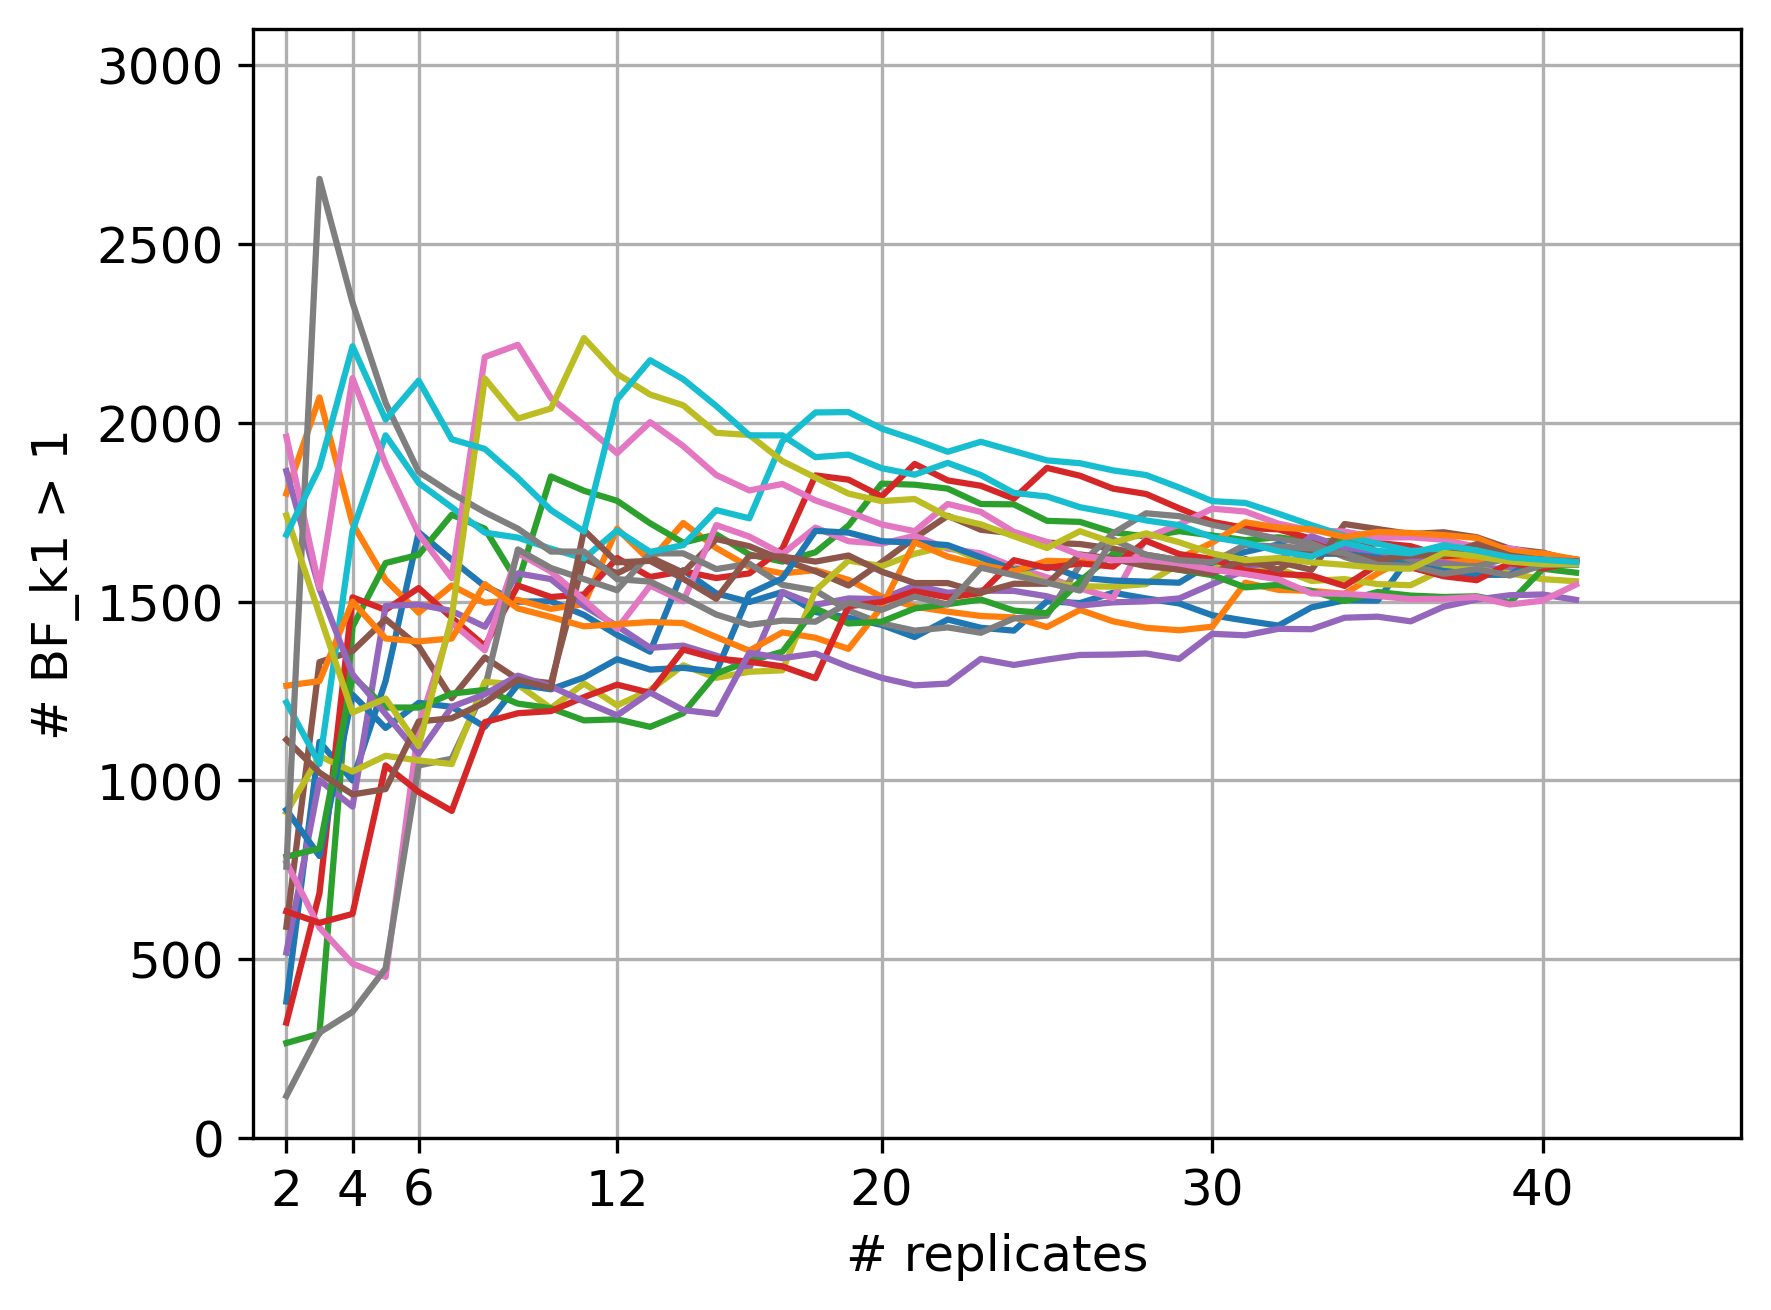

In [19]:
# Create the plot
ax = WT_cons_it_20.plot(legend=False, grid=True,
                      xlabel='# replicates',
                      ylabel='# BF_k1 > 1', fontsize=12)

# Set axis limits
ax.set_xlim(-1, 44)  # Set x-axis limits (adjust as needed)
ax.set_ylim(0, 3100)  # Set y-axis limits based on your data

# Set axis labels with increased font size
ax.set_xlabel('# replicates', fontsize=12)  # Adjust fontsize as needed
ax.set_ylabel('# BF_k1 > 1', fontsize=12)  # Adjust fontsize as needed

# Customize x-ticks and increase font size
ax.set_xticks([0, 2, 4, 10, 18, 28, 38])
ax.set_xticklabels(['2', '4', '6', '12', '20', '30', '40'], fontsize=12)  # Adjust fontsize as needed



# Show the plot
plt.show()

In [20]:
# then bootstrapping this idea
# 100 times for identifying genes

WT_cons_it = pd.DataFrame({})
# Which genes are consistently inconsistent (CIG) in the wild-type?
WT_CIG = []

for i in range(100):

    col_order = np.array(WT_yeast.columns[1:])
    np.random.shuffle(col_order)
    # print(col_order)

    cumu_BF_k1 = get_cumu_BF(WT_yeast[col_order])
    # Which genes are consistently inconsistent (CIG) in the wild-type?
    WT_CIG.append(WT_yeast.loc[(cumu_BF_k1).iloc[:,-1] > 1].index)

    WT_cons_it[f'{i+1}'] = ((cumu_BF_k1) > 1).sum()

# Display the DataFrame
display(WT_cons_it)


,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
2,3407,1235,490,410,341,1265,618,1261,1314,597,...,494,1739,1657,759,1864,1355,1418,1255,581,2389
3,3022,1273,387,1211,385,1897,1086,2310,1241,862,...,1593,2581,1203,957,1415,957,1631,950,756,1854
4,2560,1419,1598,1402,1169,1863,888,2332,1279,1085,...,1378,2216,1091,953,1563,1542,1542,1037,1670,1627
5,2274,1425,1779,1455,1099,2010,1126,2062,1614,978,...,1483,2588,1012,949,1540,1450,1700,1021,1806,1477
6,2634,1339,2287,1451,1120,1756,1252,1849,1463,1367,...,1713,2287,1208,925,1572,1506,1598,1275,1694,1419
7,2479,1366,2046,1488,1195,1817,1356,1665,1329,1669,...,1602,2457,1248,1250,1445,1423,1522,1260,1760,1373
8,2230,1400,2118,1407,1116,1672,1338,1558,1227,1559,...,1552,2537,1275,1336,1301,1614,1539,1169,1817,1362
9,2034,1338,2040,1354,1298,1792,1462,1399,1234,1502,...,1482,2349,1244,1276,1820,1523,1442,1597,1947,1342
10,2107,1313,2010,1513,1233,1678,1645,1421,1236,1442,...,1684,2287,1158,1302,2071,1462,1449,1701,1842,1292
11,2081,1581,1904,1573,1217,1647,1557,1659,1229,1414,...,1612,2188,1329,1783,2031,1381,1382,1793,1761,1308


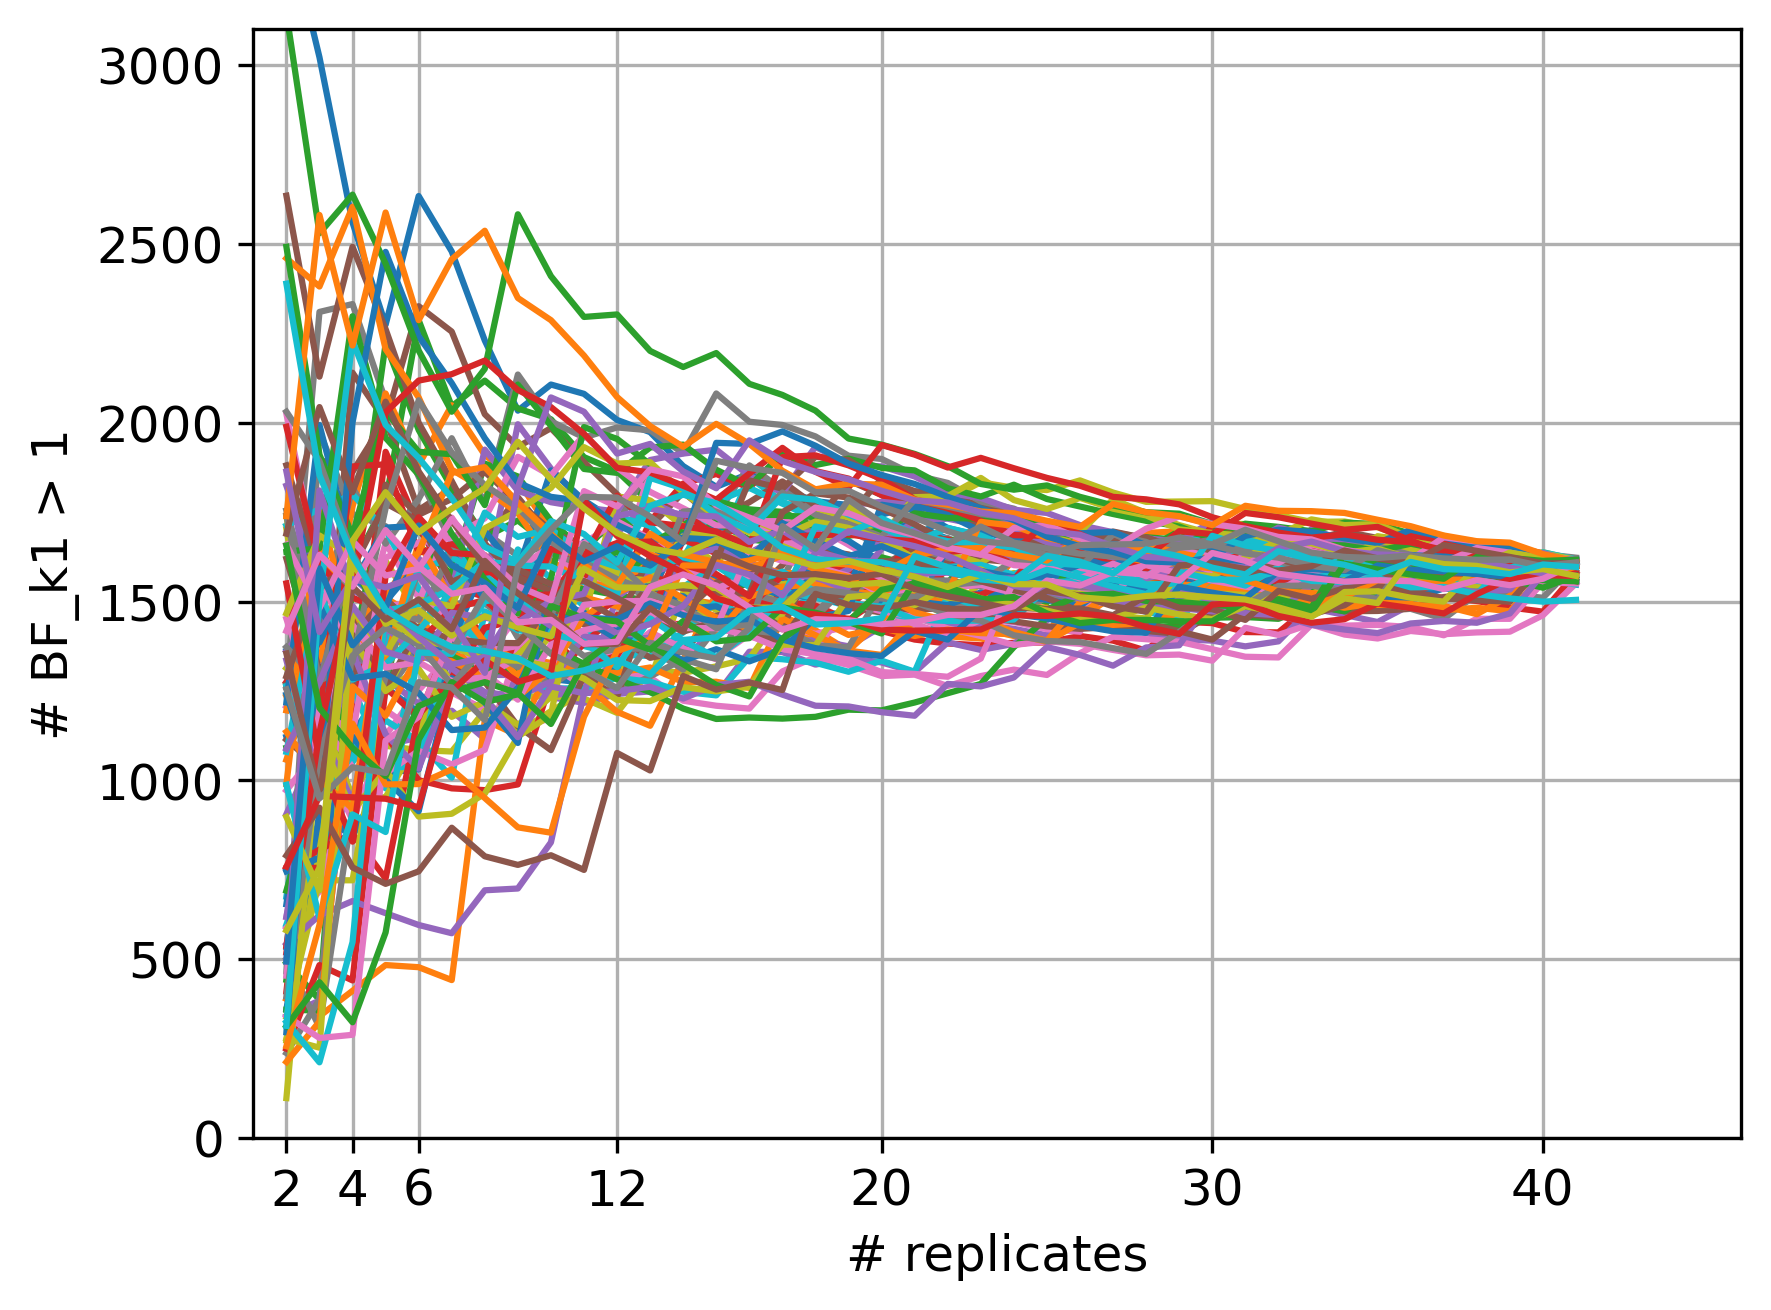

In [21]:

# Create the plot
ax = WT_cons_it.plot(legend=False, grid=True,
                      xlabel='# replicates',
                      ylabel='# BF_k1 > 1',fontsize=12)

# Set axis limits
ax.set_xlim(-1, 44)  # Set x-axis limits (adjust as needed)
ax.set_ylim(0, 3100)  # Set y-axis limits based on your data

# Set axis labels with increased font size
ax.set_xlabel('# replicates', fontsize=12)  # Adjust fontsize as needed
ax.set_ylabel('# BF_k1 > 1', fontsize=12)  # Adjust fontsize as needed

# Customize x-ticks and increase font size
ax.set_xticks([0, 2, 4, 10, 18, 28, 38])
ax.set_xticklabels(['2', '4', '6', '12', '20', '30', '40'], fontsize=12)  # Adjust fontsize as needed



# Show the plot
plt.show()

In [22]:
# again, bootstrapping this idea but on the mutant

Snf2_cons_it_20 = pd.DataFrame({})
# Which genes are consistently inconsistent (CIG) in the mutant?
# Snf2_CIG = []

for i in range(20):

    col_order = np.array(Snf2_yeast.columns[1:])
    np.random.shuffle(col_order)
    # print(col_order)

    cumu_BF_k1 = get_cumu_BF(Snf2_yeast[col_order])
    # Snf2_CIG.append(Snf2_yeast.loc[(cumu_BF_k1).iloc[:,-1] > 1].index)

    Snf2_cons_it_20[f'{i+1}'] = ((cumu_BF_k1) > 1).sum()

# Display the DataFrame
display(Snf2_cons_it_20)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
2,966,918,590,1767,737,419,480,601,1662,996,325,677,302,816,632,692,201,690,637,328
3,1038,796,345,1471,715,435,531,620,1518,870,605,1372,1963,915,559,577,788,407,686,700
4,897,975,492,1759,727,648,543,708,1348,697,583,1188,1555,936,877,584,553,529,668,639
5,700,986,572,1510,1009,614,549,764,1206,676,623,1061,1447,761,798,575,440,556,626,594
6,1054,1105,606,1464,1209,573,459,881,1125,946,708,887,1347,710,920,545,609,587,576,554
7,1080,993,628,1391,1095,740,539,865,1056,1081,909,1046,1203,822,1084,572,648,548,606,754
8,1074,1024,588,1404,941,732,549,763,943,998,1161,1141,1212,829,1068,606,570,537,604,789
9,1159,1265,587,1310,963,990,569,722,876,1040,1070,1182,1095,1131,1111,604,517,556,589,764
10,1381,1169,784,1310,959,1208,564,682,841,956,1130,1081,1016,1084,1291,629,598,569,678,771
11,1286,1112,868,1212,956,1149,566,643,829,918,1169,1020,942,1035,1184,611,691,574,774,743


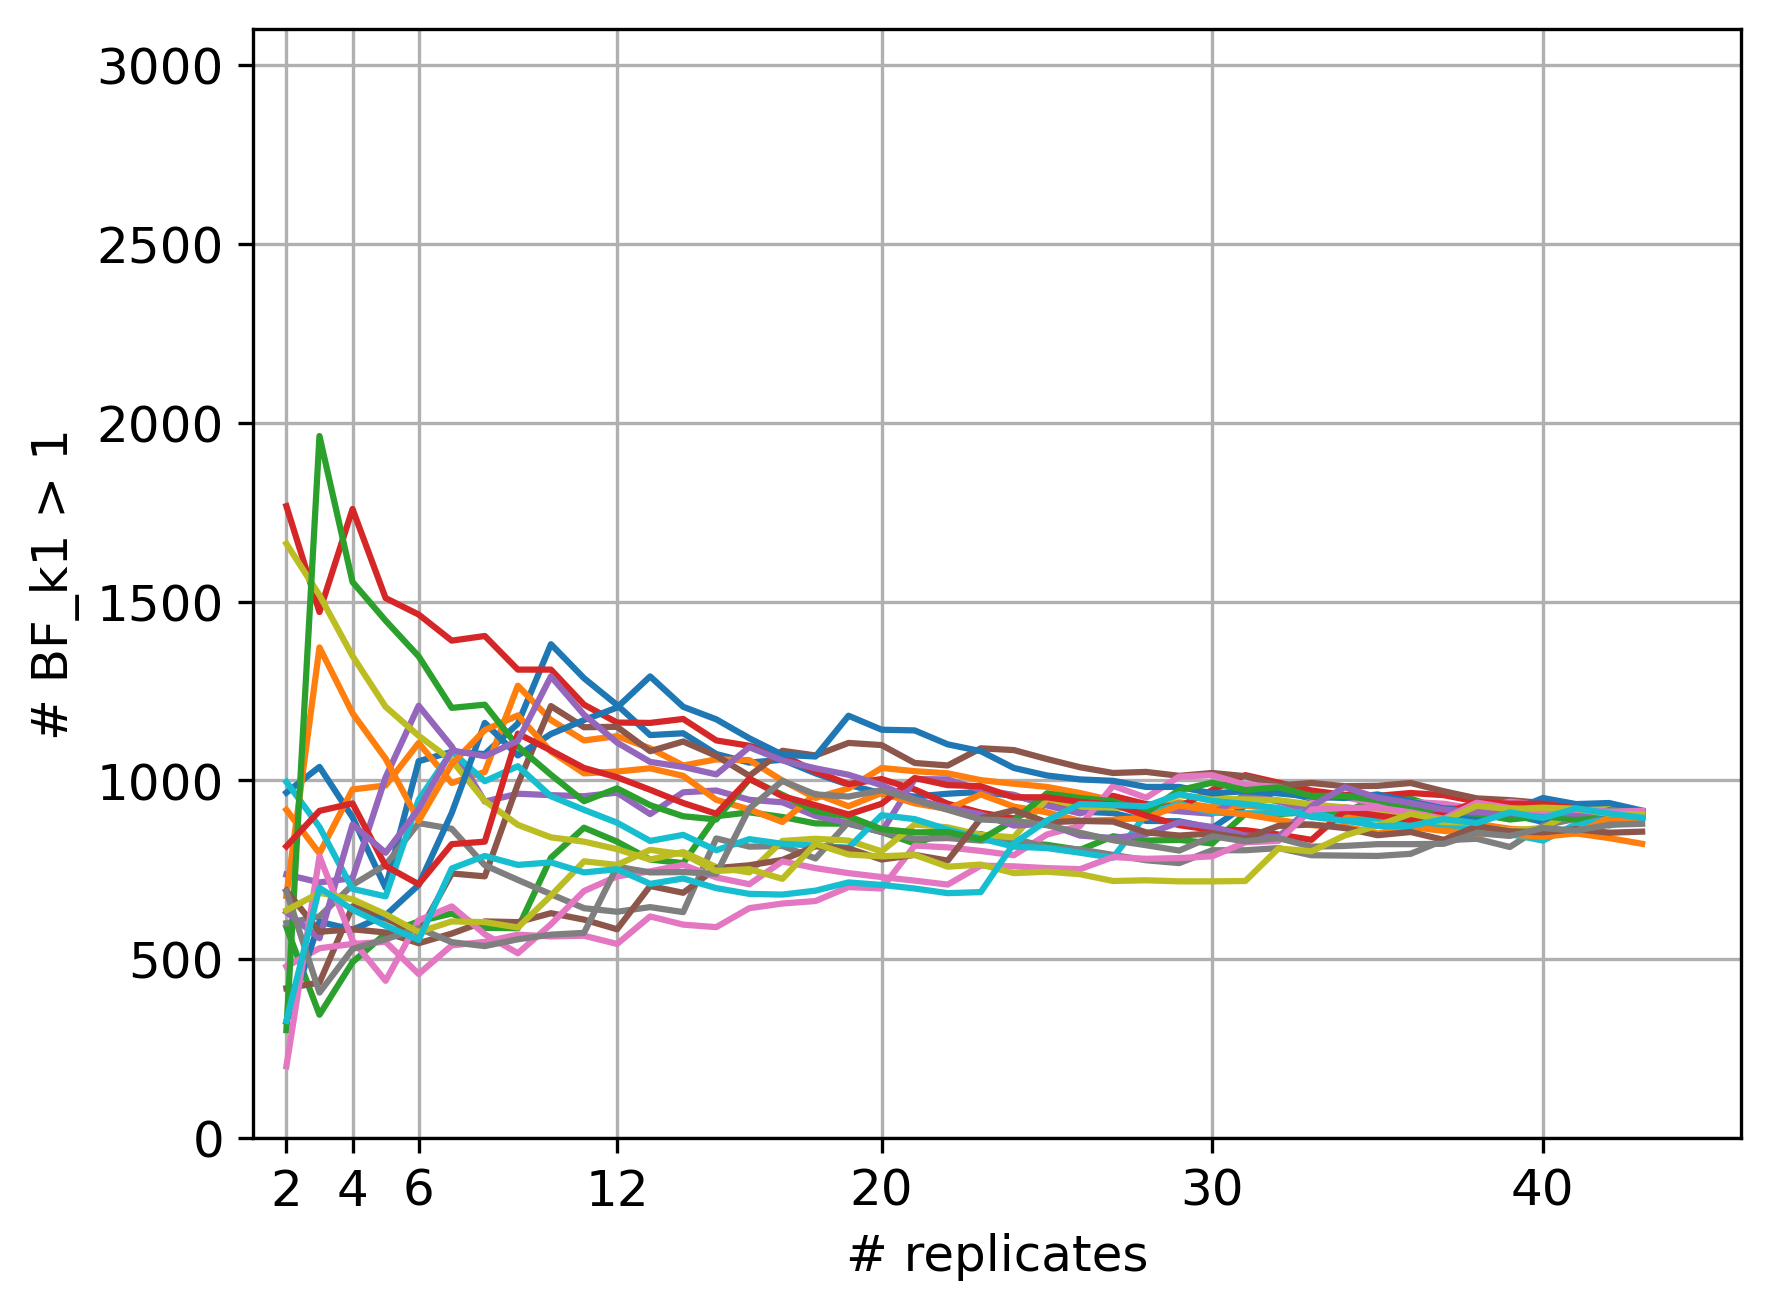

In [23]:

# Create the plot
ax = Snf2_cons_it_20.plot(legend=False, grid=True, fontsize=12)

# Set axis limits
ax.set_xlim(-1, 44)  # Set x-axis limits (adjust as needed)
ax.set_ylim(0, 3100)  # Set y-axis limits based on your data

# Set axis labels with increased font size
ax.set_xlabel('# replicates', fontsize=12)  # Adjust fontsize as needed
ax.set_ylabel('# BF_k1 > 1', fontsize=12)  # Adjust fontsize as needed

# Customize x-ticks and increase font size
ax.set_xticks([0, 2, 4, 10, 18, 28, 38])
ax.set_xticklabels(['2', '4', '6', '12', '20', '30', '40'], fontsize=12)  # Adjust fontsize as needed



# Show the plot
plt.show()

In [24]:
# again, bootstrapping this idea but on the mutant

Snf2_cons_it = pd.DataFrame({})
Snf2_CIG = []

for i in range(100):

    col_order = np.array(Snf2_yeast.columns[1:])
    np.random.shuffle(col_order)
    # print(col_order)

    cumu_BF_k1 = get_cumu_BF(Snf2_yeast[col_order])
    Snf2_CIG.append(Snf2_yeast.loc[(cumu_BF_k1).iloc[:,-1] > 1].index)

    Snf2_cons_it[f'{i+1}'] = ((cumu_BF_k1) > 1).sum()

# Display the DataFrame
display(Snf2_cons_it)

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
2,1230,308,624,410,315,913,287,542,584,469,...,131,344,612,377,584,1130,646,608,473,1248
3,1002,912,848,380,560,982,394,331,1177,310,...,958,479,888,821,736,802,942,514,491,1521
4,868,707,727,476,576,872,454,492,928,547,...,806,1456,761,645,575,718,892,617,601,1169
5,803,661,696,534,583,735,503,677,1181,538,...,767,1435,660,1073,670,682,900,798,597,1302
6,750,647,608,463,594,758,545,891,1255,842,...,647,1226,625,990,582,658,1339,809,576,1287
7,753,588,627,545,551,713,557,1124,1324,1008,...,572,1191,588,910,557,656,1183,754,1010,1184
8,706,563,622,583,549,714,552,1001,1190,968,...,620,1171,551,1026,511,607,1073,802,924,1212
9,632,537,615,567,548,698,708,926,1104,1146,...,1030,1227,740,957,526,563,1029,773,1065,1089
10,709,583,799,632,551,829,680,904,1091,1084,...,973,1166,706,932,503,542,944,747,988,1120
11,745,629,758,672,568,952,681,940,1051,1000,...,916,1105,702,893,534,697,930,734,923,1121


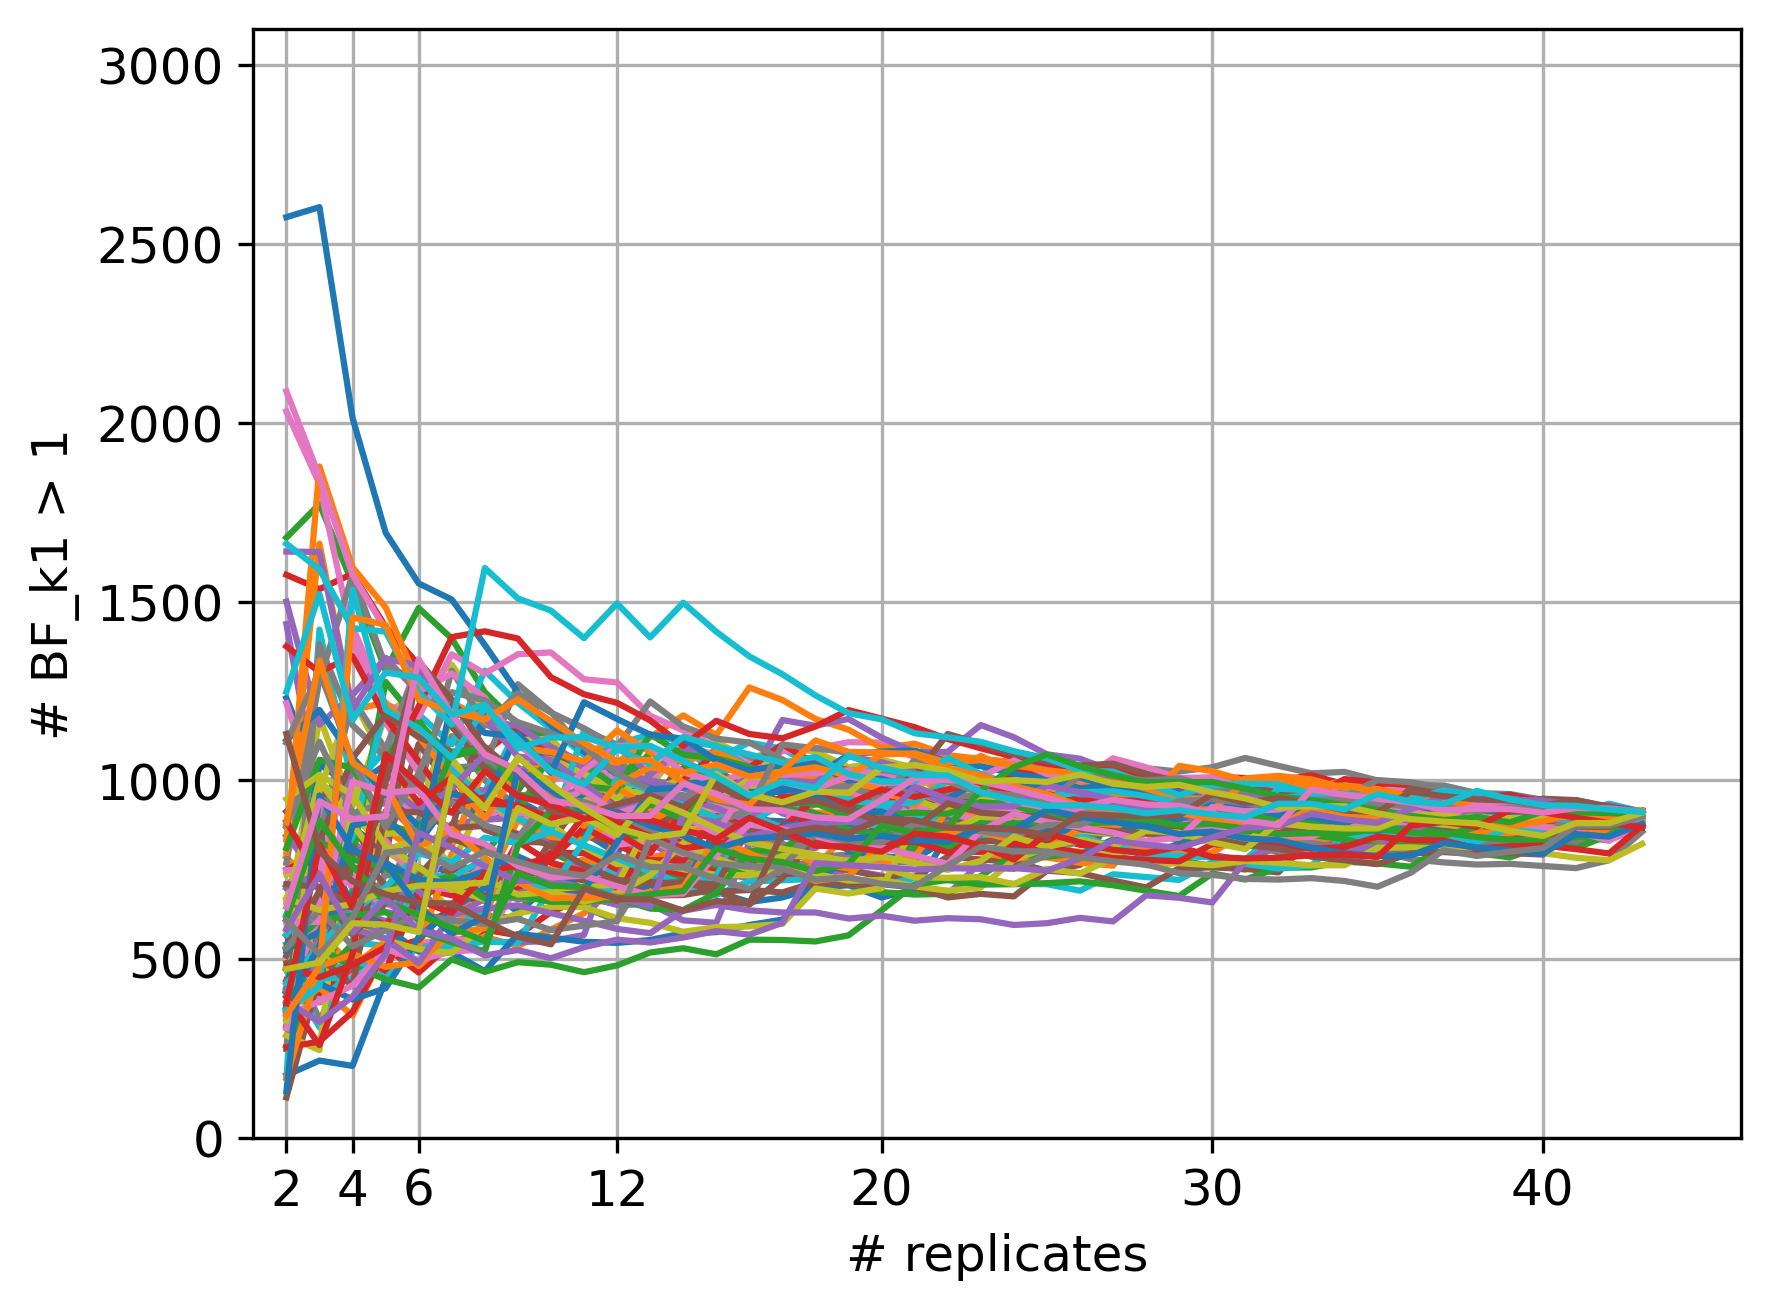

In [25]:
# Create the plot
ax = Snf2_cons_it.plot(legend=False, grid=True,
                      xlabel='# replicates',
                      ylabel='# BF_k1 > 1', fontsize=12)

# Set axis limits
ax.set_xlim(-1, 44)  # Set x-axis limits (adjust as needed)
ax.set_ylim(0, 3100)  # Set y-axis limits based on your data

# Set axis labels with increased font size
ax.set_xlabel('# replicates', fontsize=12)  # Adjust fontsize as needed
ax.set_ylabel('# BF_k1 > 1', fontsize=12)  # Adjust fontsize as needed

# Customize x-ticks and increase font size
ax.set_xticks([0, 2, 4, 10, 18, 28, 38])
ax.set_xticklabels(['2', '4', '6', '12', '20', '30', '40'], fontsize=12)  # Adjust fontsize as needed



# Show the plot
plt.show()

In [26]:
# Checking for intersections and unions in Snf2_CIG

# Convert each inner list to a set
sets = [set(lst) for lst in Snf2_CIG]

print('# genes with BF_k1 > 1 for all replicates throughout the iterations')
for lst in Snf2_CIG:
    print(len(lst))

# Find the intersection of all sets
Snf2_intersection = set.intersection(*sets)

# Print the Snf2_intersection
print('intersection: ', len(Snf2_intersection))

# Find the union of all sets
Snf2_union = set.union(*sets)

# Print the union
print('union: ', len(Snf2_union))


# genes with BF_k1 > 1 for all replicates throughout the iterations
879
910
874
907
873
910
884
911
912
913
897
905
907
901
895
913
912
857
889
899
873
899
910
911
901
910
896
911
910
906
873
910
905
910
914
874
884
907
906
903
907
914
914
912
914
868
913
903
901
874
912
884
914
912
910
896
912
911
895
901
901
889
905
911
910
913
898
911
884
900
914
916
913
914
874
911
872
897
823
894
896
912
906
874
913
914
889
899
895
913
879
915
905
868
911
912
912
899
910
912
intersection:  758
union:  922


In [27]:
# Checking for intersections and unions in WT_CIG

# Convert each inner list to a set
sets = [set(lst) for lst in WT_CIG]

print('# genes with BF_k1 > 1 for all replicates throughout the iterations')
for lst in WT_CIG:
    print(len(lst))

# Find the intersection of all sets
WT_intersection = set.intersection(*sets)

# Print the WT_intersection
print('intersection: ', len(WT_intersection))

# Find the union of all sets
WT_union = set.union(*sets)

# Print the union
print('union: ', len(WT_union))


# genes with BF_k1 > 1 for all replicates throughout the iterations
1557
1580
1617
1580
1608
1615
1581
1623
1614
1601
1618
1610
1613
1611
1617
1607
1597
1551
1608
1615
1596
1551
1572
1618
1606
1602
1608
1614
1617
1557
1612
1617
1617
1608
1548
1617
1551
1605
1610
1548
1597
1601
1580
1611
1617
1594
1551
1597
1605
1618
1611
1610
1607
1613
1580
1557
1601
1581
1603
1618
1606
1614
1557
1607
1611
1603
1612
1604
1617
1594
1613
1604
1607
1581
1608
1596
1617
1618
1606
1614
1617
1598
1572
1612
1572
1607
1601
1618
1598
1505
1610
1612
1617
1572
1604
1608
1607
1610
1572
1597
intersection:  1425
union:  1633


In [28]:
# importing bayexpress results to explore the CIGs

RALL_bayexpress = pd.read_csv('DGE_results/RALL_bayexpress.csv').iloc[:,1:].rename(columns={'genes': "locus_name"})

RALL_bayexpress

,locus_name,BF_21,FC
0,15S_rRNA,-3.710645,0.274047
1,21S_rRNA,-1.302642,0.147177
2,HRA1,-5.206545,-0.564787
3,ICR1,76.746125,0.504048
4,LSR1,0.451012,0.120243
...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839
7122,tY(GUA)M1,-7.406574,0.022303
7123,tY(GUA)M2,-7.727890,0.183767
7124,tY(GUA)O,-7.622253,0.347266


In [29]:
# let's see what those CIGs are

display(RALL_bayexpress.iloc[list(WT_union)]) 
display(RALL_bayexpress.iloc[list(Snf2_union)])

# hmm interesting

,locus_name,BF_21,FC
1,21S_rRNA,-1.302642,0.147177
4,LSR1,0.451012,0.120243
41,RDN5-1,13.774601,0.316040
46,RDN5-6,15.230943,0.469612
56,RUF5-1,-1.191579,0.080133
...,...,...,...
6731,YPR191W,218.989419,0.279871
6745,YPR204W,814.266672,0.541523
6752,snR17a,7.383833,0.329308
6761,snR30,20.556922,0.159709


,locus_name,BF_21,FC
0,15S_rRNA,-3.710645,0.274047
1,21S_rRNA,-1.302642,0.147177
4,LSR1,0.451012,0.120243
4100,YLL021W,891.706282,0.521375
4103,YLL024C,9077.546061,-0.490986
...,...,...,...
4063,YKR094C,158.639355,-0.086969
4064,YKR095W,1141.755429,0.533953
4068,YKR098C,843.035626,0.732050
4085,YLL008W,1202.946112,-0.845752


In [30]:
# let's see what CIGs have BF_21 > 1

# out of 1633
display(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1])

# out of 922
display(RALL_bayexpress.iloc[list(Snf2_union)].loc[RALL_bayexpress.BF_21 > 1])

# hmm interesting

,locus_name,BF_21,FC
41,RDN5-1,13.774601,0.316040
46,RDN5-6,15.230943,0.469612
58,SCR1,10.530223,0.125605
59,SRG1,365.733360,-0.939803
60,TLC1,777.763124,0.472738
...,...,...,...
6731,YPR191W,218.989419,0.279871
6745,YPR204W,814.266672,0.541523
6752,snR17a,7.383833,0.329308
6761,snR30,20.556922,0.159709


,locus_name,BF_21,FC
4100,YLL021W,891.706282,0.521375
4103,YLL024C,9077.546061,-0.490986
4105,YLL026W,6986.693811,-0.641283
4118,YLL039C,533.296466,0.257212
4120,YLL041C,3.231386,0.060734
...,...,...,...
4060,YKR091W,757.902699,-0.557891
4063,YKR094C,158.639355,-0.086969
4064,YKR095W,1141.755429,0.533953
4068,YKR098C,843.035626,0.732050


In [31]:
# calculating average <q> for each additional replicate for the plots


def get_avq(data):
    output = pd.DataFrame({'genes': data.genes})
    for k in range(2,len(data.columns)):

        N = sum(data.iloc[:,1:k].sum(axis=0, numeric_only=True))

        n_i = data.iloc[:,1:k].sum(axis=1, numeric_only=True)
        
        output[f'{k-1}'] = (n_i + 1) / (N+2)

    return output


# WT_yeast = get_BF_21(WT_yeast)

# display(WT_yeast)

# Snf2_yeast = get_BF_21(Snf2_yeast)

# display(Snf2_yeast)

WT_yeast_avq = get_avq(WT_yeast)

display(WT_yeast_avq)


Snf2_yeast_avq = get_avq(Snf2_yeast)

display(Snf2_yeast_avq)


WT_yeast_avq.to_csv('WT_yeast_avq.csv')
Snf2_yeast_avq.to_csv('Snf2_yeast_avq.csv')

,genes,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,15S_rRNA,5.030082e-07,1.082671e-06,2.266838e-06,1.757651e-06,1.936241e-06,1.611843e-06,1.414441e-06,1.262933e-06,1.211224e-06,...,1.904640e-06,1.853748e-06,1.946728e-06,1.911901e-06,1.879292e-06,1.874652e-06,1.864698e-06,1.802844e-06,1.838121e-06,1.808986e-06
1,21S_rRNA,3.521057e-06,7.001270e-06,9.757261e-06,9.667083e-06,1.097203e-05,9.352440e-06,8.599160e-06,7.869044e-06,7.712282e-06,...,1.143895e-05,1.116937e-05,1.165616e-05,1.143130e-05,1.125617e-05,1.124791e-05,1.114460e-05,1.082007e-05,1.111147e-05,1.103367e-05
2,HRA1,6.706775e-07,4.330683e-07,3.942327e-07,3.254910e-07,3.356151e-07,3.373626e-07,3.536103e-07,3.053245e-07,3.213451e-07,...,3.409082e-07,3.498319e-07,3.457776e-07,3.543033e-07,3.621552e-07,3.608785e-07,3.579971e-07,3.515545e-07,3.605317e-07,3.538079e-07
3,ICR1,1.274287e-05,1.436343e-05,1.507940e-05,1.507023e-05,1.448308e-05,1.510635e-05,1.486771e-05,1.450291e-05,1.438637e-05,...,1.402170e-05,1.395360e-05,1.399016e-05,1.398161e-05,1.403270e-05,1.409661e-05,1.399302e-05,1.393298e-05,1.398095e-05,1.403248e-05
4,LSR1,1.022783e-05,1.616788e-05,2.252055e-05,2.018044e-05,2.098885e-05,2.226593e-05,2.221316e-05,2.034571e-05,2.072676e-05,...,2.320770e-05,2.282563e-05,2.321551e-05,2.321690e-05,2.314857e-05,2.302277e-05,2.269390e-05,2.223207e-05,2.225545e-05,2.218147e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1.676694e-07,1.443561e-07,9.855819e-08,6.509820e-08,5.163308e-08,7.496946e-08,6.429279e-08,5.551354e-08,4.943770e-08,...,1.852762e-08,1.803257e-08,1.728888e-08,1.671242e-08,1.631330e-08,1.596807e-08,1.556509e-08,1.502370e-08,1.477589e-08,1.426645e-08
7122,tY(GUA)M1,1.676694e-07,7.217804e-08,9.855819e-08,9.764730e-08,1.032662e-07,9.371182e-08,8.036599e-08,6.939192e-08,7.415655e-08,...,4.817182e-08,4.688468e-08,4.840887e-08,5.013727e-08,4.893989e-08,5.109783e-08,4.980829e-08,4.807583e-08,4.728285e-08,4.850592e-08
7123,tY(GUA)M2,1.676694e-07,7.217804e-08,9.855819e-08,6.509820e-08,5.163308e-08,3.748473e-08,4.821959e-08,4.163515e-08,3.707828e-08,...,1.482210e-08,1.442606e-08,1.383111e-08,1.336994e-08,1.305064e-08,1.277446e-08,1.245207e-08,1.201896e-08,1.182071e-08,1.141316e-08
7124,tY(GUA)O,1.676694e-07,7.217804e-08,4.927909e-08,3.254910e-08,2.581654e-08,1.874236e-08,3.214639e-08,2.775677e-08,2.471885e-08,...,1.111657e-08,1.081954e-08,1.037333e-08,1.336994e-08,1.305064e-08,1.277446e-08,1.245207e-08,1.201896e-08,1.182071e-08,1.141316e-08


,genes,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,15S_rRNA,4.888009e-07,3.699162e-07,4.332702e-07,4.431870e-07,1.392500e-06,1.178058e-06,1.093068e-06,9.750276e-07,1.354988e-06,...,2.247482e-06,2.162239e-06,2.153404e-06,2.107489e-06,2.068077e-06,2.252873e-06,2.219721e-06,2.264491e-06,2.219710e-06,2.184992e-06
1,21S_rRNA,3.128326e-06,2.642259e-06,2.635727e-06,3.050169e-06,1.045480e-05,8.800790e-06,8.213191e-06,7.299531e-06,8.343876e-06,...,1.195357e-05,1.158432e-05,1.153281e-05,1.139055e-05,1.119966e-05,1.252824e-05,1.236465e-05,1.273472e-05,1.249908e-05,1.232996e-05
2,HRA1,5.865611e-07,3.699162e-07,3.610585e-07,2.867680e-07,2.873412e-07,2.425414e-07,2.732670e-07,2.898731e-07,2.614890e-07,...,2.475201e-07,2.514231e-07,2.603689e-07,2.526609e-07,2.534122e-07,2.465408e-07,2.432571e-07,2.434937e-07,2.431111e-07,2.376114e-07
3,ICR1,2.013860e-05,2.124376e-05,2.213289e-05,2.255039e-05,2.192635e-05,2.195000e-05,2.166400e-05,2.130567e-05,2.095478e-05,...,1.977850e-05,1.973357e-05,1.970839e-05,1.967188e-05,1.975450e-05,1.979128e-05,1.981993e-05,1.979874e-05,1.982148e-05,1.987671e-05
4,LSR1,2.062740e-05,1.659338e-05,1.707807e-05,1.910918e-05,2.278837e-05,2.311074e-05,2.170954e-05,2.058099e-05,2.169170e-05,...,2.351111e-05,2.317493e-05,2.318508e-05,2.295350e-05,2.265855e-05,2.414683e-05,2.418197e-05,2.428173e-05,2.402572e-05,2.406074e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1.955204e-07,1.056903e-07,7.221170e-08,5.213964e-08,4.420634e-08,3.464878e-08,4.554450e-08,3.952815e-08,3.565759e-08,...,1.320107e-08,1.571395e-08,1.837898e-08,1.783489e-08,1.747671e-08,1.700282e-08,1.658571e-08,1.623291e-08,2.114009e-08,2.324459e-08
7122,tY(GUA)M1,9.776019e-08,5.284517e-08,7.221170e-08,5.213964e-08,8.841268e-08,6.929756e-08,6.072600e-08,5.270420e-08,4.754345e-08,...,4.950401e-08,5.028463e-08,5.207378e-08,5.350466e-08,5.243012e-08,5.100845e-08,4.975714e-08,4.869873e-08,4.756521e-08,4.648918e-08
7123,tY(GUA)M2,9.776019e-08,5.284517e-08,3.610585e-08,2.606982e-08,2.210317e-08,1.732439e-08,1.518150e-08,1.317605e-08,1.188586e-08,...,1.650134e-08,1.571395e-08,1.531582e-08,1.486241e-08,1.456392e-08,1.416901e-08,1.382143e-08,1.352743e-08,1.321256e-08,1.291366e-08
7124,tY(GUA)O,9.776019e-08,1.056903e-07,7.221170e-08,5.213964e-08,4.420634e-08,3.464878e-08,3.036300e-08,2.635210e-08,3.565759e-08,...,1.980160e-08,1.885673e-08,2.144214e-08,2.080737e-08,2.038949e-08,1.983662e-08,1.935000e-08,1.893840e-08,1.849758e-08,1.807913e-08


In [32]:
RALL_bayexpress['BF_k1_WT'] = get_BF_k1(WT_yeast.iloc[:,1:])
RALL_bayexpress['CIG_WT'] = RALL_bayexpress.index.isin(WT_union)

RALL_bayexpress['BF_k1_Snf2'] = get_BF_k1(Snf2_yeast.iloc[:,1:])
RALL_bayexpress['CIG_Snf2'] = RALL_bayexpress.index.isin(Snf2_union)

display(RALL_bayexpress)
RALL_bayexpress.to_csv('RALL_bayexpress.csv')

,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
0,15S_rRNA,-3.710645,0.274047,-107.138056,False,53.627445,True
1,21S_rRNA,-1.302642,0.147177,362.115507,True,1052.203968,True
2,HRA1,-5.206545,-0.564787,-240.338654,False,-258.581365,False
3,ICR1,76.746125,0.504048,-194.077441,False,-196.467262,False
4,LSR1,0.451012,0.120243,251.787125,True,478.066414,True
...,...,...,...,...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839,-270.299503,False,-281.214963,False
7122,tY(GUA)M1,-7.406574,0.022303,-262.736078,False,-275.253246,False
7123,tY(GUA)M2,-7.727890,0.183767,-271.177492,False,-284.863866,False
7124,tY(GUA)O,-7.622253,0.347266,-270.291196,False,-282.682788,False


# How many genes would be marked as not consistent?

In [33]:
display((RALL_bayexpress.BF_k1_WT > 1).describe())

display((RALL_bayexpress.BF_k1_Snf2 > 1).describe())

display(((RALL_bayexpress.BF_k1_WT > 1) & (RALL_bayexpress.BF_k1_Snf2 > 1)).describe())

display(((RALL_bayexpress.BF_k1_WT > 1) | (RALL_bayexpress.BF_k1_Snf2 > 1)).describe())



count      7126
unique        2
top       False
freq       5524
Name: BF_k1_WT, dtype: object

count      7126
unique        2
top       False
freq       6223
Name: BF_k1_Snf2, dtype: object

count      7126
unique        2
top       False
freq       6359
dtype: object

count      7126
unique        2
top       False
freq       5388
dtype: object

In [34]:
WT_yeast_q = pd.DataFrame({})

for col in WT_yeast.columns[1:43]:

    WT_yeast_q[col+'_q'] = (WT_yeast[col]+1) / (sum(WT_yeast[col])+2)

WT_yeast_q.to_csv('WT_yeast_q.csv')

WT_yeast_q

,8_q,32_q,10_q,42_q,16_q,7_q,39_q,24_q,22_q,15_q,...,26_q,12_q,35_q,25_q,37_q,2_q,29_q,21_q,14_q,34_q
0,4.065404e-07,1.528210e-06,8.837392e-07,6.252496e-07,5.386557e-06,3.385883e-07,1.727728e-07,1.042284e-06,7.542872e-07,5.250010e-07,...,1.211476e-06,3.652909e-07,1.002461e-06,6.128721e-07,1.810945e-06,1.647548e-06,1.578264e-06,2.093998e-06,1.353193e-06,4.192114e-06
1,3.353958e-06,1.000283e-05,1.325609e-05,8.878545e-06,3.986052e-05,4.175923e-06,1.900501e-06,5.732564e-06,5.908583e-06,2.756255e-06,...,5.365107e-06,1.461164e-06,5.012305e-06,3.922381e-06,1.101658e-05,9.758554e-06,1.167915e-05,1.439624e-05,7.910972e-06,2.305663e-05
2,1.016351e-07,2.778564e-07,6.312423e-07,2.500999e-07,1.795519e-07,5.643139e-07,2.591592e-07,2.084569e-07,7.542872e-07,1.312503e-07,...,3.461360e-07,8.523455e-07,7.017227e-07,6.128721e-07,4.527362e-07,3.802034e-07,6.313054e-07,6.543744e-07,5.204587e-07,3.353691e-07
3,1.229785e-05,9.030333e-06,1.679104e-05,1.338034e-05,1.274819e-05,1.354353e-05,1.235325e-05,1.396661e-05,1.470860e-05,1.509378e-05,...,1.618186e-05,1.205460e-05,1.383396e-05,1.287031e-05,1.720398e-05,1.571507e-05,1.188959e-05,1.518149e-05,1.634240e-05,1.492393e-05
4,8.638984e-06,7.779979e-06,2.007350e-05,1.613144e-05,5.655885e-05,2.200824e-05,9.502503e-06,2.105414e-05,1.760003e-05,1.312503e-05,...,1.540305e-05,1.692515e-05,2.335734e-05,1.887646e-05,1.735489e-05,2.078445e-05,2.788266e-05,2.970860e-05,1.374011e-05,3.236312e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,1.016351e-07,1.389282e-07,1.262485e-07,1.250499e-07,1.795519e-07,1.128628e-07,8.638639e-08,1.042284e-07,1.257145e-07,1.312503e-07,...,8.653399e-08,1.217636e-07,1.002461e-07,1.225744e-07,1.509121e-07,2.534689e-07,1.052176e-07,1.308749e-07,1.040917e-07,8.384228e-08
7122,1.016351e-07,1.389282e-07,1.262485e-07,1.250499e-07,1.795519e-07,1.128628e-07,8.638639e-08,2.084569e-07,2.514291e-07,1.312503e-07,...,8.653399e-08,1.217636e-07,2.004922e-07,1.225744e-07,3.018241e-07,1.267345e-07,1.052176e-07,2.617497e-07,1.040917e-07,1.676846e-07
7123,1.016351e-07,1.389282e-07,1.262485e-07,1.250499e-07,1.795519e-07,2.257256e-07,8.638639e-08,1.042284e-07,1.257145e-07,1.312503e-07,...,8.653399e-08,1.217636e-07,1.002461e-07,1.225744e-07,1.509121e-07,1.267345e-07,1.052176e-07,1.308749e-07,1.040917e-07,8.384228e-08
7124,1.016351e-07,1.389282e-07,1.262485e-07,2.500999e-07,1.795519e-07,2.257256e-07,8.638639e-08,1.042284e-07,2.514291e-07,1.312503e-07,...,8.653399e-08,1.217636e-07,2.004922e-07,1.225744e-07,1.509121e-07,1.267345e-07,1.052176e-07,1.308749e-07,1.040917e-07,8.384228e-08


In [35]:
Snf2_yeast_q = pd.DataFrame({})

for col in Snf2_yeast.columns[1:43]:

    Snf2_yeast_q[col+'_q'] = (Snf2_yeast[col]+1) / (sum(Snf2_yeast[col])+2)

Snf2_yeast_q.to_csv('Snf2_yeast_q.csv')

Snf2_yeast_q

,38_q,13_q,41_q,35_q,34_q,30_q,37_q,7_q,33_q,25_q,...,22_q,10_q,2_q,28_q,27_q,15_q,9_q,29_q,17_q,31_q
0,2.900728e-07,9.497976e-07,4.451590e-06,5.269065e-07,3.567655e-07,1.443493e-06,7.028538e-07,6.136811e-07,1.127455e-06,1.822563e-06,...,7.894240e-06,8.074703e-07,3.450619e-07,7.889508e-07,4.152554e-06,5.007454e-06,4.976768e-06,4.247007e-07,1.691104e-06,8.953913e-07
1,2.030510e-06,4.748988e-06,2.988925e-05,4.281115e-06,2.259515e-06,6.538174e-06,6.827723e-06,4.173032e-06,3.883457e-06,2.512533e-05,...,3.114636e-05,6.560696e-06,2.185392e-06,6.048623e-06,2.366956e-05,3.848866e-05,1.808630e-05,3.079080e-06,8.314594e-06,5.148500e-06
2,4.351093e-07,2.374494e-07,3.815649e-07,3.951799e-07,7.135311e-07,3.396454e-07,1.004077e-07,6.136811e-07,2.505456e-07,1.301831e-07,...,4.305949e-07,4.037352e-07,2.300412e-07,6.574590e-07,2.768369e-07,2.945561e-07,1.213846e-07,5.308759e-07,2.818506e-07,3.357717e-07
3,2.393101e-05,1.733381e-05,1.895106e-05,1.890277e-05,1.783828e-05,2.037873e-05,1.857542e-05,1.976053e-05,1.828983e-05,1.978783e-05,...,1.901794e-05,1.937929e-05,2.265906e-05,1.354366e-05,1.716389e-05,2.002981e-05,1.784353e-05,2.325236e-05,1.860214e-05,1.712436e-05
4,8.412112e-06,7.242207e-06,2.899893e-05,1.653169e-05,1.296248e-05,2.606779e-05,1.546278e-05,1.190541e-05,2.117111e-05,2.603662e-05,...,3.695939e-05,1.594754e-05,1.196214e-05,1.078233e-05,3.681931e-05,4.320156e-05,3.204553e-05,1.369660e-05,1.719289e-05,2.126554e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,1.450364e-07,1.187247e-07,1.271883e-07,1.317266e-07,1.189218e-07,8.491135e-08,1.004077e-07,2.454724e-07,1.252728e-07,1.301831e-07,...,7.176581e-08,1.009338e-07,1.150206e-07,1.314918e-07,1.384185e-07,9.818537e-08,1.213846e-07,1.061752e-07,1.409253e-07,1.119239e-07
7122,1.450364e-07,1.187247e-07,1.271883e-07,1.317266e-07,3.567655e-07,8.491135e-08,2.008154e-07,1.227362e-07,2.505456e-07,1.301831e-07,...,1.435316e-07,1.009338e-07,1.150206e-07,2.629836e-07,1.384185e-07,1.963707e-07,1.213846e-07,1.061752e-07,1.409253e-07,1.119239e-07
7123,1.450364e-07,1.187247e-07,1.271883e-07,6.586331e-08,1.189218e-07,8.491135e-08,1.004077e-07,1.227362e-07,1.252728e-07,1.301831e-07,...,7.176581e-08,1.009338e-07,1.150206e-07,1.314918e-07,1.384185e-07,1.963707e-07,1.213846e-07,2.123504e-07,1.409253e-07,1.119239e-07
7124,1.450364e-07,1.187247e-07,1.271883e-07,6.586331e-08,1.189218e-07,8.491135e-08,1.004077e-07,1.227362e-07,1.252728e-07,1.301831e-07,...,7.176581e-08,1.009338e-07,2.300412e-07,1.314918e-07,1.384185e-07,9.818537e-08,2.427692e-07,1.061752e-07,1.409253e-07,2.238478e-07


In [36]:
RALL_bayexpress

,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
0,15S_rRNA,-3.710645,0.274047,-107.138056,False,53.627445,True
1,21S_rRNA,-1.302642,0.147177,362.115507,True,1052.203968,True
2,HRA1,-5.206545,-0.564787,-240.338654,False,-258.581365,False
3,ICR1,76.746125,0.504048,-194.077441,False,-196.467262,False
4,LSR1,0.451012,0.120243,251.787125,True,478.066414,True
...,...,...,...,...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839,-270.299503,False,-281.214963,False
7122,tY(GUA)M1,-7.406574,0.022303,-262.736078,False,-275.253246,False
7123,tY(GUA)M2,-7.727890,0.183767,-271.177492,False,-284.863866,False
7124,tY(GUA)O,-7.622253,0.347266,-270.291196,False,-282.682788,False


In [37]:
# WT union CIG, examples

display(WT_yeast.iloc[list(WT_union)][:5])
display(Snf2_yeast.iloc[list(WT_union)][:5])

print(list(WT_yeast.iloc[list(WT_union)][:5].genes))


,genes,8,32,10,42,16,7,39,24,22,...,26,12,35,25,37,2,29,21,14,34
1,21S_rRNA,20,76,101,99,128,74,36,32,57,...,10,274,49,30,72,58,21,159,107,70
4,LSR1,60,163,233,163,193,375,194,84,211,...,66,385,232,149,114,81,109,132,243,128
41,RDN5-1,50,42,105,48,36,80,37,50,49,...,28,184,40,48,27,107,63,17,201,29
46,RDN5-6,21,11,71,7,16,15,16,25,23,...,8,95,14,9,24,42,5,4,106,18
56,RUF5-1,159,404,313,454,457,732,297,155,247,...,138,380,326,197,554,102,318,198,351,350


,genes,38,13,41,35,34,30,37,7,33,...,2,28,27,15,9,29,17,31,39,12
1,21S_rRNA,31,18,23,44,356,35,33,13,148,...,64,79,67,13,576,52,234,23,44,24
4,LSR1,210,103,159,260,298,303,96,132,263,...,250,195,153,57,742,227,227,117,224,136
41,RDN5-1,49,40,48,79,175,77,33,34,134,...,96,103,72,36,326,50,53,43,55,58
46,RDN5-6,18,14,11,31,84,21,18,7,46,...,49,47,27,8,212,10,35,13,20,26
56,RUF5-1,472,217,267,409,291,619,301,292,196,...,499,271,366,225,376,491,385,373,541,375


['21S_rRNA', 'LSR1', 'RDN5-1', 'RDN5-6', 'RUF5-1']


In [38]:
# WT union CIGs, examples

# let's see what CIGs have BF_21 > 1

display(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[:5])

# hmm interesting

display(WT_yeast.iloc[RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[:5].index])
display(Snf2_yeast.iloc[RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[:5].index])

display(list(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[:5].locus_name))


,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
3425,YJL098W,1.025525,-0.091190,113.153322,True,-129.167778,False
5742,YOL115W,1.025888,0.075491,57.474774,True,-151.068325,False
4515,YLR333C,1.447678,-0.029229,196.567132,True,97.113080,True
5822,YOR021C,1.559348,0.053039,92.677944,True,-118.214175,False
1540,YDR408C,2.105490,-0.049501,-6.324689,True,-62.712539,False


,genes,8,32,10,42,16,7,39,24,22,...,26,12,35,25,37,2,29,21,14,34
3425,YJL098W,191,444,189,274,482,835,377,351,333,...,425,319,600,276,190,276,740,141,675,209
5742,YOL115W,264,616,398,517,650,1168,568,430,505,...,422,490,739,394,326,292,794,277,827,350
4515,YLR333C,1998,3860,2924,4519,3708,6447,3511,3448,4006,...,3045,4715,4487,2930,2862,2345,4573,2453,5339,3408
5822,YOR021C,613,1116,776,1198,1241,2370,1216,1055,1132,...,931,1311,1572,964,616,765,1750,593,1737,959
1540,YDR408C,1267,1172,950,1814,1178,2045,1383,1651,1693,...,1096,2000,1386,1014,1127,1575,1944,888,1873,1428


,genes,38,13,41,35,34,30,37,7,33,...,2,28,27,15,9,29,17,31,39,12
3425,YJL098W,422,275,270,406,206,479,388,422,328,...,632,355,483,251,318,441,302,344,430,272
5742,YOL115W,631,462,529,677,386,884,442,632,568,...,996,523,574,420,580,568,518,596,664,599
4515,YLR333C,4120,3430,3463,4082,2873,4475,2786,4668,4097,...,5687,3221,3619,2557,4038,3758,3569,3820,3803,3577
5822,YOR021C,1312,1060,1072,1540,870,1717,1025,1434,1224,...,2116,1146,1205,805,1134,1341,1011,1206,1316,945
1540,YDR408C,1539,1440,1308,1575,1285,2026,1449,1278,1144,...,2456,1158,1872,1210,1756,1399,1320,1310,1314,1219


['YJL098W', 'YOL115W', 'YLR333C', 'YOR021C', 'YDR408C']

In [39]:
# WT union CIGs, examples

# let's see what CIGs have BF_21 > 1

display(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[-5:])

# hmm interesting

display(WT_yeast.iloc[RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[-5:].index])
display(Snf2_yeast.iloc[RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[-5:].index])

display(list(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[-5:].locus_name))


,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
2639,YGR192C,101517.928512,-0.456369,52530.251796,True,23438.201797,True
6209,YOR383C,118338.158193,1.478789,1920.042323,True,10685.558763,True
1465,YDR342C,151255.899622,-2.643644,21822.485016,True,2076.867472,True
3012,YHR174W,205922.035360,-0.847059,13841.417356,True,7918.998188,True
1175,YDR077W,341558.582413,-3.175344,13017.391966,True,1422.483953,True


,genes,8,32,10,42,16,7,39,24,22,...,26,12,35,25,37,2,29,21,14,34
2639,YGR192C,188825,196804,172119,328674,225435,357247,261535,343455,268394,...,246621,358116,278531,209062,191739,318398,338511,169415,348635,244192
6209,YOR383C,12713,11599,10437,18694,10940,21254,11928,20445,14405,...,11286,21585,17444,12251,10503,16357,18733,8162,19044,14295
1465,YDR342C,20257,15357,26120,29846,13135,29153,16334,36916,24772,...,13346,47023,14585,25504,23590,25281,20870,22192,24641,22226
3012,YHR174W,129581,133346,109168,207147,145674,268592,196925,211933,189789,...,157763,235246,191877,136675,120124,195917,243868,107856,237778,158290
1175,YDR077W,35563,31153,31852,54048,30594,65771,39147,58449,45629,...,37196,63004,38304,36697,33838,54827,54371,26658,50782,45913


,genes,38,13,41,35,34,30,37,7,33,...,2,28,27,15,9,29,17,31,39,12
2639,YGR192C,205731,199983,210124,204494,158243,242692,209080,210681,178901,...,323457,180745,239701,163673,219417,167478,177709,170179,160083,142435
6209,YOR383C,36728,39745,40978,49945,33631,56767,31049,52374,33049,...,60183,37108,50351,34465,46750,37686,43105,47984,34235,29763
1465,YDR342C,6160,4351,3760,5849,2707,8347,4344,2973,2201,...,7219,4147,5938,2552,3313,4676,2446,2606,4178,1935
3012,YHR174W,107206,100381,112005,104187,76754,126571,101232,105342,114602,...,165739,86105,112391,81618,106975,86521,85779,95411,83560,75125
1175,YDR077W,5978,5813,4679,5852,4049,9193,4939,4684,2002,...,9285,5125,7021,4165,5594,5013,4016,3755,4674,3275


['YGR192C', 'YOR383C', 'YDR342C', 'YHR174W', 'YDR077W']

In [40]:
# Snf2 union CIGs, examples

display(WT_yeast.iloc[list(Snf2_union)][:5])
display(Snf2_yeast.iloc[list(Snf2_union)][:5])

print(list(Snf2_yeast.iloc[list(Snf2_union)][:5].genes))


,genes,8,32,10,42,16,7,39,24,22,...,26,12,35,25,37,2,29,21,14,34
0,15S_rRNA,2,12,31,8,21,11,2,3,7,...,0,49,9,4,11,12,1,22,12,4
1,21S_rRNA,20,76,101,99,128,74,36,32,57,...,10,274,49,30,72,58,21,159,107,70
4,LSR1,60,163,233,163,193,375,194,84,211,...,66,385,232,149,114,81,109,132,243,128
4100,YLL021W,750,1190,759,1284,1172,2758,1282,1194,1057,...,1067,1624,1648,1073,742,902,1868,606,1943,1076
4103,YLL024C,13940,16062,13989,24924,15680,28293,20802,24091,19080,...,17245,27935,22996,17317,16363,19475,24881,13493,25858,19777


,genes,38,13,41,35,34,30,37,7,33,...,2,28,27,15,9,29,17,31,39,12
0,15S_rRNA,4,2,5,5,46,5,4,2,40,...,7,15,6,1,85,8,34,3,6,3
1,21S_rRNA,31,18,23,44,356,35,33,13,148,...,64,79,67,13,576,52,234,23,44,24
4,LSR1,210,103,159,260,298,303,96,132,263,...,250,195,153,57,742,227,227,117,224,136
4100,YLL021W,1921,1652,1855,2319,1259,2869,1387,1922,1951,...,3413,1731,1890,1437,1780,1846,1514,1997,1825,1484
4103,YLL024C,14168,15026,15877,15309,11377,15925,11809,19464,17624,...,23070,12714,13424,11915,15851,12510,13526,16627,11588,12153


['15S_rRNA', '21S_rRNA', 'LSR1', 'YLL021W', 'YLL024C']


In [41]:
# exporting this table to compare with WT-WT control experiments

RALL_bayexpress.iloc[(list(WT_union))].to_csv('RALL_bayexpress_CIG_WT_union.csv')